<a href="https://colab.research.google.com/github/Janina712/MLTSA22_JBoecher/blob/main/Other/4.%20Compute_RhythmMetrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**0. Imports & Set-Up**

In [ ]:
import pandas as pd
import numpy as np
import os
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/RhythmAnalysisPipeline/3.MLU_Matched/

/content/gdrive/MyDrive/RhythmAnalysisPipeline/3.MLU_Matched


In [ ]:
reading_vowels = pd.read_excel("reading_TextGrid_comb_BG_vowelsMatched.xlsx")
interview_vowels = pd.read_excel("interview_TextGrid_comb_BG_vowelsMatched.xlsx")
reading_consonants = pd.read_excel("reading_TextGrid_comb_BG_consonantsMatched.xlsx")
interview_consonants = pd.read_excel("interview_TextGrid_comb_BG_consonantsMatched.xlsx")

In [ ]:
result_reading_pws = pd.DataFrame(columns = ["ID","nPVI", "rPVI","%V","DeltaC", "DeltaV", "VarcoC", "VarcoV"])
result_interview_pws = pd.DataFrame(columns = ["ID","nPVI", "rPVI","%V","DeltaC", "DeltaV", "VarcoC", "VarcoV"])
result_reading_control = pd.DataFrame(columns = ["ID","nPVI","rPVI","%V","DeltaC", "DeltaV", "VarcoC", "VarcoV"])
result_interview_control = pd.DataFrame(columns = ["ID","nPVI","rPVI","%V","DeltaC", "DeltaV", "VarcoC", "VarcoV"])

In [ ]:
pws_IDs = ['24fa', '24ma', '24mb', '26f', '29ma', '29mb', '29mc', '32m', '34m', '35mb', '46ma', '50fa', '50fb', '54f', '57m', '60m', '62f', '62m']

In [ ]:
control_IDs = ['C10_KS', 'C11_NP', 'C12_CC', 'C13_RG','C1_DS', 'C2_JH', 'C3_MD', 'C4_ZO', 'C5_HL', 'C6_LH', 'C7_SH', 'C9_RD']

In [ ]:
#set up result path to save along the way
%cd /content/gdrive/MyDrive/RhythmAnalysisPipeline/

dir = "4.MetricsResults"
if os.path.exists(dir) == False:
  os.mkdir(dir)

%cd /content/gdrive/MyDrive/RhythmAnalysisPipeline/4.MetricsResults/

/content/gdrive/MyDrive/RhythmAnalysisPipeline
/content/gdrive/MyDrive/RhythmAnalysisPipeline/4.MetricsResults


# **Define Functions**

In [ ]:
def split_groups(df):
  pws = df[df["Group"] == "PWS"]  # get subset of sound dataframe that corresponds to current participant
  pws.index = range(len(pws.index)) # reset index
  pws.drop(['Unnamed: 0'], axis=1 , inplace = True)
  
  control = df[df["Group"] == "Control"]  # get subset of sound dataframe that corresponds to current participant
  control.index = range(len(control.index)) # reset index
  control.drop(['Unnamed: 0'], axis=1 , inplace = True)
  return(pws, control)

In [ ]:
def split_fluency(df):
  fluent = df[df["FluencyStatus"] == "Fluent"]  # get subset of sound dataframe that corresponds to current participant
  fluent.index = range(len(fluent.index)) # reset index
  fluent.drop(['Unnamed: 0'], axis=1 , inplace = True)
  
  disfluent = df[df["FluencyStatus"] == "Disfluent"]  # get subset of sound dataframe that corresponds to current participant
  disfluent.index = range(len(disfluent.index)) # reset index
  disfluent.drop(['Unnamed: 0'], axis=1 , inplace = True)
  return(fluent, disfluent)

In [ ]:
def computenPVI(df_vowels):
  participant = []                                                                                                                                                ## group  -
  for p in df_vowels["ID"].unique():                                                                                                                              ## participant  --                                                                                                                                            
      subset_ID = df_vowels[df_vowels["ID"] == p]  # get subset of sound dataframe that corresponds to current participant
      subset_ID.index = range(len(subset_ID.index)) # reset index
      breath_group = []
      for BG in subset_ID["Breath.Group"].unique():                                                                                                               ## Breath Group  ---
        subset_BG = subset_ID[subset_ID["Breath.Group"] == BG]
        subset_BG.index = range(len(subset_BG.index)) 
        sum = 0   
        for m in range(1, len(subset_BG)):                                                                                                                        ## vowel            ----
          subsum = (subset_BG["Duration"][m-1] - subset_BG["Duration"][m])/((subset_BG["Duration"][m-1] + subset_BG["Duration"][m])/2)
          sum = sum + abs(subsum)                                                                                                                                 ## vowel            ----
        if len(subset_BG) < 2:                                                                                                                                    ## Breath Group    ---
          continue
        else:
          BG_nPVI = 100 * (sum/(len(subset_BG)-1))
          breath_group.append(BG_nPVI)                                                                                                                          
      participant.append(breath_group)                                                                                                                            ## participant  --                                                                                                                                    ## group   -
  participant = pd.DataFrame(participant)
  group = []  
  for k in range(0, len(participant)):
    participant_avg = participant.iloc[k].mean()
    group.append(participant_avg)
  group = pd.DataFrame(group, columns = ["nPVI"])
  return(group)

In [ ]:
def computerPVI(df_consonants):
  participant = []                                                                                                                                                ## group  -
  for p in df_consonants["ID"].unique():                                                                                                                              ## participant  --                                                                                                                                            
      subset_ID = df_consonants[df_consonants["ID"] == p]  # get subset of sound dataframe that corresponds to current participant
      subset_ID.index = range(len(subset_ID.index)) # reset index
      breath_group = []
      for BG in subset_ID["Breath.Group"].unique():                                                                                                               ## Breath Group  ---
        subset_BG = subset_ID[subset_ID["Breath.Group"] == BG]
        subset_BG.index = range(len(subset_BG.index)) 
        sum = 0   
        for m in range(1, len(subset_BG)):                                                                                                                        ## vowel            ----
          subsum = subset_BG["Duration"][m-1] - subset_BG["Duration"][m]
          sum = sum + abs(subsum)                                                                                                                                 ## vowel            ----
        if len(subset_BG) < 2:                                                                                                                                    ## Breath Group    ---
          continue
        else:
          BG_rPVI = sum/(len(subset_BG)-1)
          breath_group.append(BG_rPVI)                                                                                                                          
      participant.append(breath_group)                                                                                                                            ## participant  --                                                                                                                                    ## group   -
  participant = pd.DataFrame(participant)
  group = []  
  for k in range(0, len(participant)):
    participant_avg = participant.iloc[k].mean()
    group.append(participant_avg)
  group = pd.DataFrame(group, columns = ["rPVI"])
  return(group)

In [ ]:
def computePercV(df_vowels, df_consonants):
  participant = []
  for p in df_vowels["ID"].unique():
      subset_ID = df_vowels[df_vowels["ID"] == p]  # get subset of sound dataframe that corresponds to current participant
      subset_ID.index = range(len(subset_ID.index)) # reset index
      numberBG = len(subset_ID["Breath.Group"].unique())
      subset_cons = df_consonants[df_consonants["ID"] == p]
      subset_cons.index = range(len(subset_cons.index))
      Vsums = np.zeros(numberBG)
      Csums = np.zeros(numberBG)
      for i in range(1,numberBG+1):
        for j in range(0, len(subset_ID)):
          if subset_ID["Breath.Group"][j] == i:
            Vsums[i-1] = Vsums[i-1] + df_vowels["Duration"][j]  
      for i in range(1,numberBG+1):
        for j in range(0, len(subset_cons)):
          if subset_cons["Breath.Group"][j] == i:
            Csums[i-1] = Csums[i-1] + subset_cons["Duration"][j] 
      VCsums = Vsums + Csums
      percV = Vsums/VCsums
      percV = percV[~np.isnan(percV)]
      percV_avg = percV.mean()
      participant.append([percV_avg])
  participant = pd.DataFrame (participant, columns = ['%V'])  
  return(participant)

In [ ]:
def computeDeltaC(df_consonants):
  participant = []
  for p in df_consonants["ID"].unique():      
    subset_ID = df_consonants[df_consonants["ID"] == p]  # get subset of sound dataframe that corresponds to current participant
    subset_ID.index = range(len(subset_ID.index)) # reset index
    numberBG = len(subset_ID["Breath.Group"].unique())
    grouped_cons = subset_ID.groupby("Breath.Group")                      
    grouped_lists = grouped_cons["Duration"].apply(list)
    grouped_lists = grouped_lists.reset_index()
    deltaC = np.zeros(len(grouped_lists))
    for i in range(0,len(grouped_lists)):
      deltaC[i] = np.std(grouped_lists["Duration"][i])
    deltaC_avg = deltaC.mean()
    participant.append([deltaC_avg])
  participant = pd.DataFrame (participant, columns = ['DeltaC'])  
  return(participant)

In [ ]:
def computeDeltaV(df_vowels):
    participant = []
    for p in df_vowels["ID"].unique():      
      subset_ID = df_vowels[df_vowels["ID"] == p]  # get subset of sound dataframe that corresponds to current participant
      subset_ID.index = range(len(subset_ID.index)) # reset index
      numberBG = len(subset_ID["Breath.Group"].unique())
      grouped_vowels = subset_ID.groupby("Breath.Group")
      grouped_lists = grouped_vowels["Duration"].apply(list)
      grouped_lists = grouped_lists.reset_index()
      deltaV = np.zeros(len(grouped_lists))
      for i in range(0,len(grouped_lists)):
        deltaV[i] = np.std(grouped_lists["Duration"][i])
      deltaV_avg = deltaV.mean()
      participant.append([deltaV_avg])
    participant = pd.DataFrame (participant, columns = ['DeltaV'])  
    return(participant)

In [ ]:
def computeVarcoC(df_consonants, deltaC):
    n = -1
    participant = []
    for p in df_consonants["ID"].unique(): 
      n = n +1     
      subset_ID = df_consonants[df_consonants["ID"] == p]  # get subset of sound dataframe that corresponds to current participant
      subset_ID.index = range(len(subset_ID.index)) # reset 
      numberBG = len(subset_ID["Breath.Group"].unique())
      grouped_consonants = subset_ID.groupby("Breath.Group")
      grouped_lists = grouped_consonants["Duration"].apply(list)
      grouped_lists = grouped_lists.reset_index()
      Cavg = np.zeros(len(grouped_lists))
      for i in range(0,len(grouped_lists)):
        Cavg[i] = np.mean(grouped_lists["Duration"][i])
      VarcoC = deltaC["DeltaC"][n]/Cavg
      VarcoC_avg = VarcoC.mean()
      participant.append([VarcoC_avg])
    participant = pd.DataFrame (participant, columns = ['VarcoC'])
    return(participant)

In [ ]:
def computeVarcoV(df_vowels, deltaV):
    n = -1
    participant = []
    for p in df_vowels["ID"].unique(): 
      n = n +1     
      subset_ID = df_vowels[df_vowels["ID"] == p]  # get subset of sound dataframe that corresponds to current participant
      subset_ID.index = range(len(subset_ID.index)) # reset index
      numberBG = len(subset_ID["Breath.Group"].unique())
      grouped_vowels = subset_ID.groupby("Breath.Group")
      grouped_lists = grouped_vowels["Duration"].apply(list)
      grouped_lists = grouped_lists.reset_index()
      Vavg = np.zeros(len(grouped_lists))
      for i in range(0,len(grouped_lists)):       
        Vavg[i] = np.mean(grouped_lists["Duration"][i])
      VarcoV = deltaV["DeltaV"][n]/Vavg                          
      VarcoV_avg = VarcoV.mean()
      participant.append([VarcoV_avg]) 
    participant = pd.DataFrame (participant, columns = ['VarcoV'])
    return(participant)

**Calculate Metrics Using Functions**

In [ ]:
reading_vowels_pws, reading_vowels_control = split_groups(reading_vowels)
reading_consonants_pws, reading_consonants_control = split_groups(reading_consonants)
interview_vowels_pws, interview_vowels_control = split_groups(interview_vowels)
interview_consonants_pws, interview_consonants_control = split_groups(interview_consonants)

In [ ]:
nPVI_reading_pws = computenPVI(reading_vowels_pws)
nPVI_reading_control = computenPVI(reading_vowels_control)
nPVI_interview_pws = computenPVI(interview_vowels_pws)
nPVI_interview_control = computenPVI(interview_vowels_control)

In [ ]:
rPVI_reading_pws = computerPVI(reading_consonants_pws)
rPVI_reading_control = computerPVI(reading_consonants_control)
rPVI_interview_pws = computerPVI(interview_consonants_pws)
rPVI_interview_control = computerPVI(interview_consonants_control)

In [ ]:
percV_reading_pws = computePercV(reading_vowels_pws, reading_consonants_pws)
percV_interview_pws = computePercV(interview_vowels_pws, interview_consonants_pws)
percV_reading_control = computePercV(reading_vowels_control, reading_consonants_control)
percV_interview_control = computePercV(interview_vowels_control, interview_consonants_control)

In [ ]:
deltaC_reading_pws = computeDeltaC(reading_consonants_pws)
deltaC_interview_pws = computeDeltaC(interview_consonants_pws)
deltaC_reading_control = computeDeltaC(reading_consonants_control)
deltaC_interview_control = computeDeltaC(interview_consonants_control)

In [ ]:
deltaV_reading_pws = computeDeltaV(reading_vowels_pws)
deltaV_interview_pws = computeDeltaV(interview_vowels_pws)
deltaV_reading_control = computeDeltaV(reading_vowels_control)
deltaV_interview_control = computeDeltaV(interview_vowels_control)

In [ ]:
varcoC_reading_pws = computeVarcoC(reading_consonants_pws, deltaC_reading_pws)
varcoC_interview_pws = computeVarcoC(interview_consonants_pws, deltaC_interview_pws)
varcoC_reading_control = computeVarcoC(reading_consonants_control, deltaC_reading_control)
varcoC_interview_control = computeVarcoC(interview_consonants_control, deltaC_interview_control)

In [ ]:
varcoV_reading_pws = computeVarcoV(reading_vowels_pws, deltaV_reading_pws)
varcoV_interview_pws = computeVarcoV(interview_vowels_pws, deltaV_interview_pws)
varcoV_reading_control = computeVarcoV(reading_vowels_control, deltaV_reading_control)
varcoV_interview_control = computeVarcoV(interview_vowels_control, deltaV_interview_control)

**Assign to DataFrame**

In [ ]:
result_reading_pws["ID"] = pws_IDs
result_reading_pws["nPVI"] = nPVI_reading_pws
result_reading_pws["rPVI"] = rPVI_reading_pws
result_reading_pws["%V"] = percV_reading_pws*100
result_reading_pws["DeltaC"] = deltaC_reading_pws
result_reading_pws["DeltaV"] = deltaV_reading_pws
result_reading_pws["VarcoC"] = varcoC_reading_pws*100
result_reading_pws["VarcoV"] = varcoV_reading_pws*100

In [ ]:
result_reading_control["ID"] = control_IDs
result_reading_control["nPVI"] = nPVI_reading_control
result_reading_control["rPVI"] = rPVI_reading_control
result_reading_control["%V"] = percV_reading_control*100
result_reading_control["DeltaC"] = deltaC_reading_control
result_reading_control["DeltaV"] = deltaV_reading_control
result_reading_control["VarcoC"] = varcoC_reading_control*100
result_reading_control["VarcoV"] = varcoV_reading_control*100

In [ ]:
result_interview_pws["ID"] = pws_IDs
result_interview_pws["nPVI"] = nPVI_interview_pws
result_interview_pws["rPVI"] = rPVI_interview_pws
result_interview_pws["%V"] = percV_interview_pws*100
result_interview_pws["DeltaC"] = deltaC_interview_pws
result_interview_pws["DeltaV"] = deltaV_interview_pws
result_interview_pws["VarcoC"] = varcoC_interview_pws*100
result_interview_pws["VarcoV"] = varcoV_interview_pws*100

In [ ]:
result_interview_control["ID"] = control_IDs
result_interview_control["nPVI"] = nPVI_interview_control
result_interview_control["rPVI"] = rPVI_interview_control
result_interview_control["%V"] = percV_interview_control*100
result_interview_control["DeltaC"] = deltaC_interview_control
result_interview_control["DeltaV"] = deltaV_interview_control
result_interview_control["VarcoC"] = varcoC_interview_control*100
result_interview_control["VarcoV"] = varcoV_interview_control*100

In [ ]:
# there are more consonants in BG than there are vowels, there are in general more even in the unmatched version... how should I match to maintain the same ratio??

**Show DataFrames**

In [ ]:
result_reading_pws

,ID,nPVI,rPVI,%V,DeltaC,DeltaV,VarcoC,VarcoV
0,24fa,69.769462,0.040859,45.924211,0.035260,0.045339,55.168310,56.752833
1,24ma,56.387716,0.047686,45.600908,0.037927,0.038741,59.578517,51.734821
2,24mb,63.740165,0.047549,43.699241,0.038580,0.042046,55.247254,58.470099
3,26f,64.437853,0.036429,47.067472,0.033425,0.040893,53.802195,52.414349
4,29ma,60.912200,0.047081,43.285759,0.041163,0.040380,58.445596,54.845454
5,29mb,60.983703,0.057130,38.428403,0.045336,0.046911,53.773158,49.490862
6,29mc,71.044822,0.055101,41.036346,0.043939,0.053907,55.523338,57.399689
7,32m,66.865079,0.057120,40.334968,0.050460,0.053180,67.028375,67.626719
8,34m,68.052404,0.057341,38.835144,0.046995,0.068345,56.789016,62.660243
9,35mb,70.025958,0.073860,41.694468,0.059158,0.063924,73.448715,56.942923


In [ ]:
result_reading_control

,ID,nPVI,rPVI,%V,DeltaC,DeltaV,VarcoC,VarcoV
0,C10_KS,68.852290,0.042710,40.736395,0.034617,0.048132,50.175247,61.122657
1,C11_NP,66.917795,0.051505,35.656482,0.041718,0.058601,52.940281,62.183480
2,C12_CC,61.479637,0.032102,39.503674,0.026686,0.033072,42.331244,48.588245
3,C13_RG,62.583076,0.040942,42.759600,0.036751,0.036588,55.635092,52.193887
4,C1_DS,68.617398,0.051455,35.256398,0.039044,0.040756,51.578556,52.652741
5,C2_JH,65.815309,0.048965,36.545598,0.037516,0.039234,52.248189,52.575648
6,C3_MD,63.576180,0.032737,43.907782,0.029212,0.036132,50.358968,52.280039
7,C4_ZO,59.793407,0.053060,34.286472,0.042230,0.038792,51.418690,51.212773
8,C5_HL,58.677071,0.035343,42.226845,0.029615,0.031473,49.935975,49.518404
9,C6_LH,64.682585,0.047838,38.806444,0.038161,0.047157,54.542548,55.262672


In [ ]:
result_interview_pws

,ID,nPVI,rPVI,%V,DeltaC,DeltaV,VarcoC,VarcoV
0,24fa,69.537450,0.048982,49.495649,0.045279,0.067058,69.219903,72.426370
1,24ma,72.012035,0.044075,50.814779,0.039224,0.066617,66.205630,80.070490
2,24mb,58.574000,0.036660,51.696246,0.034359,0.046838,60.219078,68.003783
3,26f,70.037693,0.046398,49.332043,0.044605,0.075128,69.596320,75.380318
4,29ma,68.613415,0.048766,45.647204,0.046413,0.059410,70.351105,73.122706
5,29mb,71.312694,0.048605,48.910719,0.038726,0.055778,56.830401,60.668758
6,29mc,73.791678,0.044312,49.952192,0.036357,0.060177,56.625932,64.374585
7,32m,72.902056,0.065937,42.303913,0.060436,0.071485,75.344708,80.970753
8,34m,66.779031,0.058965,42.896187,0.054390,0.083258,69.060991,78.860146
9,35mb,70.206304,0.050762,47.243054,0.043373,0.064853,61.738665,59.440750


In [ ]:
result_interview_control

,ID,nPVI,rPVI,%V,DeltaC,DeltaV,VarcoC,VarcoV
0,C10_KS,65.590193,0.043720,46.841161,0.036476,0.043312,59.080004,62.742000
1,C11_NP,69.452211,0.054498,41.099575,0.049588,0.070665,71.012711,75.370129
2,C12_CC,64.268528,0.044856,42.481980,0.041165,0.048267,61.736118,63.464569
3,C13_RG,63.808017,0.041980,48.274545,0.034250,0.049638,57.592445,65.901860
4,C1_DS,68.119123,0.054371,42.909927,0.046939,0.066704,64.388302,78.846435
5,C2_JH,68.003592,0.050249,43.746125,0.042852,0.065057,62.903718,65.322395
6,C3_MD,62.588765,0.040650,45.624890,0.035812,0.045693,57.187950,58.561654
7,C4_ZO,65.209082,0.055766,38.708089,0.047928,0.070130,59.921940,79.034894
8,C5_HL,54.689048,0.040451,47.167568,0.034993,0.039055,56.648402,57.729990
9,C6_LH,63.051998,0.039874,46.015939,0.032392,0.038430,52.096197,51.825660


**Show Group/Condition Averages**

In [ ]:
result_reading_pws.mean()

nPVI      66.905342
rPVI       0.052200
%V        41.980101
DeltaC     0.043409
DeltaV     0.051780
VarcoC    57.403576
VarcoV    57.989315
dtype: float64

In [ ]:
result_reading_control.mean()

nPVI      63.148152
rPVI       0.042789
%V        39.009907
DeltaC     0.035057
DeltaV     0.039228
VarcoC    50.985394
VarcoV    52.457076
dtype: float64

In [ ]:
result_interview_pws.mean()

nPVI      69.335782
rPVI       0.050501
%V        46.619555
DeltaC     0.044766
DeltaV     0.064409
VarcoC    63.853248
VarcoV    69.003278
dtype: float64

In [ ]:
result_interview_control.mean()

nPVI      62.902091
rPVI       0.046228
%V        44.906328
DeltaC     0.039388
DeltaV     0.050674
VarcoC    59.356139
VarcoV    63.744779
dtype: float64

**Standard Deviation**

In [ ]:
# reading pws
SD_nPVI_r_p = result_reading_pws["nPVI"].std()
SD_rPVI_r_p = result_reading_pws["rPVI"].std()
SD_PercV_r_p = result_reading_pws["%V"].std()
SD_DeltaC_r_p = result_reading_pws["DeltaC"].std()
SD_DeltaV_r_p = result_reading_pws["DeltaV"].std()
SD_VarcoC_r_p = result_reading_pws["VarcoC"].std()
SD_VarcoV_r_p = result_reading_pws["VarcoV"].std()

In [ ]:
# reading control
SD_nPVI_r_c = result_reading_control["nPVI"].std()
SD_rPVI_r_c = result_reading_control["rPVI"].std()
SD_PercV_r_c = result_reading_control["%V"].std()
SD_DeltaC_r_c = result_reading_control["DeltaC"].std()
SD_DeltaV_r_c = result_reading_control["DeltaV"].std()
SD_VarcoC_r_c = result_reading_control["VarcoC"].std()
SD_VarcoV_r_c = result_reading_control["VarcoV"].std()

In [ ]:
# interview pws
SD_nPVI_i_p = result_interview_pws["nPVI"].std()
SD_rPVI_i_p = result_interview_pws["rPVI"].std()
SD_PercV_i_p = result_interview_pws["%V"].std()
SD_DeltaC_i_p = result_interview_pws["DeltaC"].std()
SD_DeltaV_i_p = result_interview_pws["DeltaV"].std()
SD_VarcoC_i_p = result_interview_pws["VarcoC"].std()
SD_VarcoV_i_p = result_interview_pws["VarcoV"].std()

In [ ]:
# interview control
SD_nPVI_i_c = result_interview_control["nPVI"].std()
SD_rPVI_i_c = result_interview_control["rPVI"].std()
SD_PercV_i_c = result_interview_control["%V"].std()
SD_DeltaC_i_c = result_interview_control["DeltaC"].std()
SD_DeltaV_i_c = result_interview_control["DeltaV"].std()
SD_VarcoC_i_c = result_interview_control["VarcoC"].std()
SD_VarcoV_i_c = result_interview_control["VarcoV"].std()

**Result Tables**

**Reading**

In [ ]:
means = [result_reading_pws.mean()[0], result_reading_control.mean()[0], result_reading_pws.mean()[1],result_reading_control.mean()[1],result_reading_pws.mean()[2], result_reading_control.mean()[2], result_reading_pws.mean()[3],result_reading_control.mean()[3], result_reading_pws.mean()[4],result_reading_control.mean()[4], result_reading_pws.mean()[5],result_reading_control.mean()[5],result_reading_pws.mean()[6], result_reading_control.mean()[6]]

In [ ]:
fig = go.Figure(data=[go.Table(
    header=dict(values=['Rhythm Metrics', 'Group', 'Mean','SD'],
                line_color='black',
                fill_color='lightgray',
                align='left'),
    cells=dict(values=[["nPVI","", "rPVI", "","%V", "","DeltaC", "","DeltaV","", "VarcoC","", "VarcoV",""], # 1st column
                       ["Stuttering", "Non-Stuttering", "Stuttering", "Non-Stuttering", "Stuttering", "Non-Stuttering", "Stuttering", "Non-Stuttering", "Stuttering", "Non-Stuttering", "Stuttering", "Non-Stuttering", "Stuttering", "Non-Stuttering"],
                      [means[0],means[1],means[2],means[3],means[4],means[5],means[6],means[7],means[8],means[9],means[10],means[11],means[12],means[13] ],
                       [SD_nPVI_r_p, SD_nPVI_r_c, SD_rPVI_r_p, SD_rPVI_r_c, SD_PercV_r_p, SD_PercV_r_c, SD_DeltaC_r_p, SD_DeltaC_r_c, SD_DeltaV_r_p, SD_DeltaV_r_c, SD_VarcoC_r_p, SD_VarcoC_r_c, SD_VarcoV_r_p, SD_VarcoV_r_c]], # 2nd column
               line_color='darkslategray',
               fill_color='white',
               align='left'))
])

In [ ]:
fig.show()

**Interview**

In [ ]:
means = [result_interview_pws.mean()[0], result_interview_control.mean()[0], result_interview_pws.mean()[1],result_interview_control.mean()[1],result_interview_pws.mean()[2], result_interview_control.mean()[2], result_interview_pws.mean()[3],result_interview_control.mean()[3], result_interview_pws.mean()[4],result_interview_control.mean()[4], result_interview_pws.mean()[5],result_interview_control.mean()[5],result_interview_pws.mean()[6], result_interview_control.mean()[6]]

In [ ]:
fig = go.Figure(data=[go.Table(
    header=dict(values=['Rhythm Metrics', 'Group', 'Mean', 'SD'],
                line_color='black',
                fill_color='lightgray',
                align='left'),
    cells=dict(values=[["nPVI","", "rPVI", "","%V", "","DeltaC", "","DeltaV","", "VarcoC","", "VarcoV",""], # 1st column
                       ["Stuttering", "Non-Stuttering", "Stuttering", "Non-Stuttering", "Stuttering", "Non-Stuttering", "Stuttering", "Non-Stuttering", "Stuttering", "Non-Stuttering", "Stuttering", "Non-Stuttering", "Stuttering", "Non-Stuttering"],
                      [means[0],means[1],means[2],means[3],means[4],means[5],means[6],means[7],means[8],means[9],means[10],means[11],means[12],means[13] ],
                       [SD_nPVI_i_p, SD_nPVI_i_c, SD_rPVI_i_p, SD_rPVI_i_c, SD_PercV_i_p, SD_PercV_i_c, SD_DeltaC_i_p, SD_DeltaC_i_c, SD_DeltaV_i_p, SD_DeltaV_i_c, SD_VarcoC_i_p, SD_VarcoC_i_c, SD_VarcoV_i_p, SD_VarcoV_i_c]], # 2nd column
               line_color='darkslategray',
               fill_color='white',
               align='left'))
])

In [ ]:
fig.show()

**Plot Results**

**Python Built-In**

In [ ]:
pws_n = len(nPVI_reading_pws)
control_n = len(nPVI_reading_control)
subject_n = pws_n + control_n

In [ ]:
# initialize dataframes
df_boxplot_pws = pd.DataFrame()
df_boxplot_control = pd.DataFrame()
df_boxplot_group = pd.DataFrame(index = range(subject_n), columns = ["Group"])

In [ ]:
# group column
df_boxplot_group.iloc[0:pws_n] = "PWS"
df_boxplot_group.iloc[pws_n:subject_n] = "Control"

In [ ]:
#PWS rows
df_boxplot_pws["Reading"] = result_reading_pws["nPVI"]
df_boxplot_pws["Interview"] = result_interview_pws["nPVI"]

In [ ]:
#Control rows
df_boxplot_control["Reading"] =result_reading_control["nPVI"]
df_boxplot_control["Interview"] = result_interview_control["nPVI"]

In [ ]:
# Combine PWS and Control
df_boxplot = pd.concat([df_boxplot_pws, df_boxplot_control], ignore_index = True)

In [ ]:
#Add group column
df_boxplot["Group"] = df_boxplot_group

In [ ]:
df_boxplot

,Reading,Interview,Group
0,69.769462,69.537450,PWS
1,56.387716,72.012035,PWS
2,63.740165,58.574000,PWS
3,64.437853,70.037693,PWS
4,60.912200,68.613415,PWS
5,60.983703,71.312694,PWS
6,71.044822,73.791678,PWS
7,66.865079,72.902056,PWS
8,68.052404,66.779031,PWS
9,70.025958,70.206304,PWS


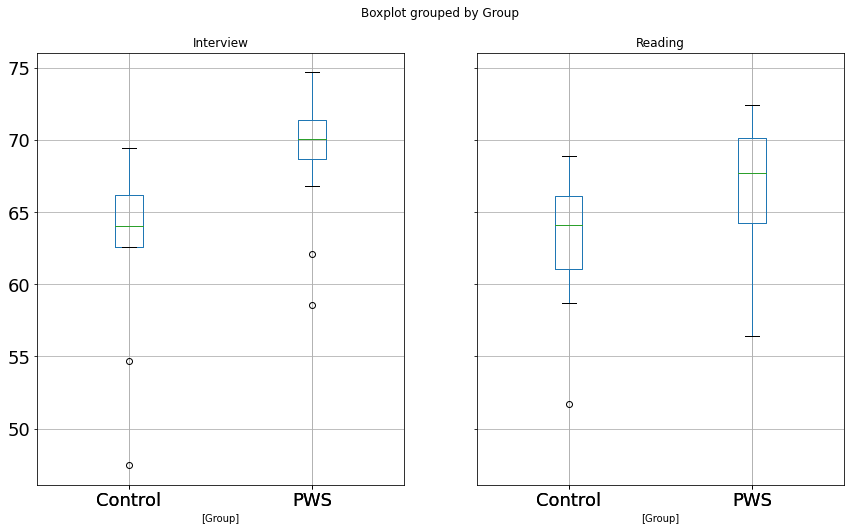

In [ ]:
boxplot = df_boxplot.boxplot(by = "Group", figsize=[14,8], fontsize = 18, return_type='axes');

**MatplotLib**

In [ ]:
df_boxplot_reading = {'Control':nPVI_reading_control, 'PWS':nPVI_reading_pws}
df_boxplot_interview = {'Control':nPVI_interview_control, 'PWS':nPVI_interview_pws}

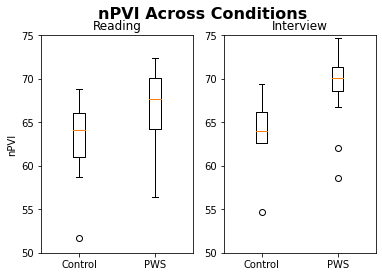

In [ ]:
fig, ([ax1, ax2]) = plt.subplots(1, 2)
fig.suptitle('nPVI Across Conditions', fontsize=16, fontweight='bold')
ax1.boxplot(df_boxplot_reading.values())
ax1.set_xticklabels(df_boxplot_reading.keys())
ax1.set_title("Reading")
ax1.set_ylabel("nPVI")
ax1.set_ylim([50, 75])
ax2.boxplot(df_boxplot_interview.values())
ax2.set_xticklabels(df_boxplot_interview.keys())
ax2.set_title("Interview")
ax2.set_ylim([50, 75])
plt.savefig("boxplot.png");

**Compare to Liss et al.**

In [ ]:
df2plot = pd.DataFrame(columns = ["Group", "Condition", "%V","VarcoV"])

In [ ]:
group = ["PWS", "Control", "PWS", "Control"]
condition = ["reading", "reading", "interview", "interview"]
PercV = [result_reading_pws.mean()[2], result_reading_control.mean()[2], result_interview_pws.mean()[2], result_interview_control.mean()[2]]
VarcoV = [result_reading_pws.mean()[6], result_reading_control.mean()[6], result_interview_pws.mean()[6], result_interview_control.mean()[6]] 

In [ ]:
df2plot["Group"] = group
df2plot["Condition"] = condition
df2plot["%V"] = PercV
df2plot["VarcoV"] = VarcoV

In [ ]:
df2plot

,Group,Condition,%V,VarcoV
0,PWS,reading,41.980101,57.989315
1,Control,reading,39.009907,52.457076
2,PWS,interview,46.619555,69.003278
3,Control,interview,44.906328,63.744779


In [ ]:
VarcoV_SDs = [SD_VarcoV_r_p, SD_VarcoV_r_c, SD_VarcoV_i_p, SD_VarcoV_i_c]
PercV_SDs =  [SD_PercV_r_p, SD_PercV_r_c, SD_PercV_i_p, SD_PercV_i_c]  

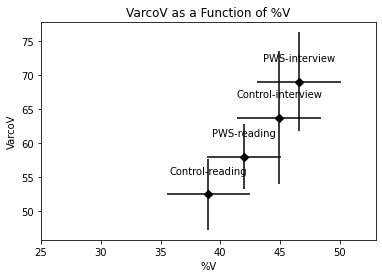

In [ ]:
result = plt.figure()
plt.plot(df2plot["%V"], df2plot["VarcoV"], 'D', markerFaceColor = 'k', markerEdgeColor = 'k')
plt.errorbar(df2plot["%V"], df2plot["VarcoV"],yerr = VarcoV_SDs, xerr = PercV_SDs, fmt = 'D',  markerFaceColor = 'k', markerEdgeColor = 'k', color = 'k')
plt.title("VarcoV as a Function of %V")
plt.xlabel("%V")
plt.xlim([25, 53])
plt.xticks(np.arange(25, 55, step=5))
#plt.ylim([50, 75])
plt.ylabel("VarcoV")
for x,y, group, cond in zip(df2plot["%V"], df2plot["VarcoV"], df2plot["Group"], df2plot["Condition"]):
  label = f"{group}-{cond}"
  plt.annotate(label, (x,y),
  xytext=(x,y+3), ha = 'center')
plt.savefig("result.png")
plt.show()

**Save Results**

In [ ]:
%cd /content/gdrive/MyDrive/RhythmAnalysisPipeline/

/content/gdrive/MyDrive/RhythmAnalysisPipeline


In [ ]:
dir = "4.MetricsResults"

if os.path.exists(dir) == False:
  os.mkdir(dir)

In [ ]:
%cd /content/gdrive/MyDrive/RhythmAnalysisPipeline/4.MetricsResults/

/content/gdrive/MyDrive/RhythmAnalysisPipeline/4.MetricsResults


In [ ]:
result_reading_pws.to_excel("reading_pws.xlsx")
result_reading_control.to_excel("reading_control.xlsx")
result_interview_pws.to_excel("interview_pws.xlsx")
result_interview_control.to_excel("interview_control.xlsx")

In [ ]:
%cd /content/gdrive/MyDrive/RhythmAnalysisPipeline/

/content/gdrive/MyDrive/RhythmAnalysisPipeline


**Fluent vs Disfluent in PWS**

**0. Imports**

In [ ]:
%cd /content/gdrive/MyDrive/RhythmAnalysisPipeline/3.MLU_Matched/

[Errno 2] No such file or directory: '/content/gdrive/MyDrive/RhythmAnalysisPipeline/3.MLU_Matched/'
/content


In [ ]:
reading_vowels = pd.read_excel("matchedVowels_reading.xlsx")
interview_vowels = pd.read_excel("matchedVowels_interview.xlsx")
reading_consonants = pd.read_excel("matchedConsonants_reading.xlsx")
interview_consonants = pd.read_excel("matchedConsonants_interview.xlsx")

In [ ]:
result_reading_fluent = pd.DataFrame(columns = ["ID","nPVI", "rPVI","%V","DeltaC", "DeltaV", "VarcoC", "VarcoV"])
result_interview_fluent = pd.DataFrame(columns = ["ID","nPVI", "rPVI","%V","DeltaC", "DeltaV", "VarcoC", "VarcoV"])
result_reading_disfluent = pd.DataFrame(columns = ["ID","nPVI", "rPVI","%V","DeltaC", "DeltaV", "VarcoC", "VarcoV"])
result_interview_disfluent = pd.DataFrame(columns = ["ID","nPVI", "rPVI","%V","DeltaC", "DeltaV", "VarcoC", "VarcoV"])

**Calculate Metrics**

In [ ]:
reading_vowels_fluent, reading_vowels_disfluent = split_fluency(reading_vowels)
reading_consonants_fluent, reading_consonants_disfluent = split_fluency(reading_consonants)
interview_vowels_fluent, interview_vowels_disfluent = split_fluency(interview_vowels)
interview_consonants_fluent, interview_consonants_disfluent = split_fluency(interview_consonants)

In [ ]:
nPVI_reading_fluent = computenPVI(reading_vowels_fluent)
nPVI_interview_fluent = computenPVI(interview_vowels_fluent)
nPVI_reading_disfluent = computenPVI(reading_vowels_disfluent)
nPVI_interview_disfluent = computenPVI(interview_vowels_disfluent)

In [ ]:
rPVI_reading_fluent = computerPVI(reading_consonants_fluent)
rPVI_interview_fluent = computerPVI(interview_consonants_fluent)
rPVI_reading_disfluent = computerPVI(reading_consonants_disfluent)
rPVI_interview_disfluent = computerPVI(interview_consonants_disfluent)

In [ ]:
percV_reading_fluent = computePercV(reading_vowels_fluent, reading_consonants_fluent)
percV_interview_fluent = computePercV(interview_vowels_fluent, interview_consonants_fluent)
percV_reading_disfluent = computePercV(reading_vowels_disfluent, reading_consonants_disfluent)
percV_interview_disfluent = computePercV(interview_vowels_disfluent, interview_consonants_disfluent)

In [ ]:
deltaC_reading_fluent = computeDeltaC(reading_consonants_fluent)
deltaC_interview_fluent = computeDeltaC(interview_consonants_fluent)
deltaC_reading_disfluent = computeDeltaC(reading_consonants_disfluent)
deltaC_interview_disfluent = computeDeltaC(interview_consonants_disfluent)

In [ ]:
deltaV_reading_fluent = computeDeltaV(reading_vowels_fluent)
deltaV_interview_fluent = computeDeltaV(interview_vowels_fluent)
deltaV_reading_disfluent = computeDeltaV(reading_vowels_disfluent)
deltaV_interview_disfluent = computeDeltaV(interview_vowels_disfluent)

In [ ]:
varcoC_reading_fluent = computeVarcoC(reading_consonants_fluent, deltaC_reading_fluent)
varcoC_interview_fluent = computeVarcoC(interview_consonants_fluent, deltaC_interview_fluent)
varcoC_reading_disfluent = computeVarcoC(reading_consonants_disfluent, deltaC_reading_disfluent)
varcoC_interview_disfluent = computeVarcoC(interview_consonants_disfluent, deltaC_interview_disfluent)

In [ ]:
varcoV_reading_fluent = computeVarcoV(reading_vowels_fluent, deltaV_reading_fluent)
varcoV_interview_fluent = computeVarcoV(interview_vowels_fluent, deltaV_interview_fluent)
varcoV_reading_disfluent = computeVarcoV(reading_vowels_disfluent, deltaV_reading_disfluent)
varcoV_interview_disfluent = computeVarcoV(interview_vowels_disfluent, deltaV_interview_disfluent)

**Assign to DataFrame**

In [ ]:
result_reading_fluent["ID"] = pws_IDs
result_reading_fluent["nPVI"] = nPVI_reading_fluent
result_reading_fluent["rPVI"] = rPVI_reading_fluent
result_reading_fluent["%V"] = percV_reading_fluent*100
result_reading_fluent["DeltaC"] = deltaC_reading_fluent
result_reading_fluent["DeltaV"] = deltaV_reading_fluent
result_reading_fluent["VarcoC"] = varcoC_reading_fluent*100
result_reading_fluent["VarcoV"] = varcoV_reading_fluent*100

In [ ]:
result_reading_disfluent["ID"] = pws_IDs
result_reading_disfluent["nPVI"] = nPVI_reading_disfluent
result_reading_disfluent["rPVI"] = rPVI_reading_disfluent
result_reading_disfluent["%V"] = percV_reading_disfluent*100
result_reading_disfluent["DeltaC"] = deltaC_reading_disfluent
result_reading_disfluent["DeltaV"] = deltaV_reading_disfluent
result_reading_disfluent["VarcoC"] = varcoC_reading_disfluent*100
result_reading_disfluent["VarcoV"] = varcoV_reading_disfluent*100

In [ ]:
result_interview_fluent["ID"] = pws_IDs
result_interview_fluent["nPVI"] = nPVI_interview_fluent
result_interview_fluent["nPVI"] = nPVI_interview_fluent
result_interview_fluent["nPVI"] = nPVI_interview_fluent
result_interview_fluent["rPVI"] = rPVI_interview_fluent
result_interview_fluent["%V"] = percV_interview_fluent*100
result_interview_fluent["DeltaC"] = deltaC_interview_fluent
result_interview_fluent["DeltaV"] = deltaV_interview_fluent
result_interview_fluent["VarcoC"] = varcoC_interview_fluent*100
result_interview_fluent["VarcoV"] = varcoV_interview_fluent*100

In [ ]:
result_interview_disfluent["ID"] = pws_IDs
result_interview_disfluent["nPVI"] = nPVI_interview_disfluent
result_interview_disfluent["nPVI"] = nPVI_interview_disfluent
result_interview_disfluent["nPVI"] = nPVI_interview_disfluent
result_interview_disfluent["rPVI"] = rPVI_interview_disfluent
result_interview_disfluent["%V"] = percV_interview_disfluent*100
result_interview_disfluent["DeltaC"] = deltaC_interview_disfluent
result_interview_disfluent["DeltaV"] = deltaV_interview_disfluent
result_interview_disfluent["VarcoC"] = varcoC_interview_disfluent*100
result_interview_disfluent["VarcoV"] = varcoV_interview_disfluent*100

**Result Tables**

**Reading**

In [ ]:
means = [result_reading_fluent.mean()[0], result_reading_disfluent.mean()[0], result_reading_fluent.mean()[1],result_reading_disfluent.mean()[1],result_reading_fluent.mean()[2], result_reading_disfluent.mean()[2], result_reading_fluent.mean()[3],result_reading_disfluent.mean()[3], result_reading_fluent.mean()[4],result_reading_disfluent.mean()[4], result_reading_fluent.mean()[5],result_reading_disfluent.mean()[5],result_reading_fluent.mean()[6], result_reading_disfluent.mean()[6]]

In [ ]:
sds = [result_reading_fluent.std()[0], result_reading_disfluent.std()[0], result_reading_fluent.std()[1],result_reading_disfluent.std()[1],result_reading_fluent.std()[2], result_reading_disfluent.std()[2], result_reading_fluent.std()[3],result_reading_disfluent.std()[3], result_reading_fluent.std()[4],result_reading_disfluent.std()[4], result_reading_fluent.std()[5],result_reading_disfluent.std()[5],result_reading_fluent.std()[6], result_reading_disfluent.std()[6]]

In [ ]:
fig = go.Figure(data=[go.Table(
    header=dict(values=['Rhythm Metrics', 'Fluency Status', 'Mean','SD'],
                line_color='black',
                fill_color='lightgray',
                align='left'),
    cells=dict(values=[["nPVI","", "rPVI", "","%V", "","DeltaC", "","DeltaV","", "VarcoC","", "VarcoV",""], # 1st column
                       ["Fluent", "Non-Fluent", "Fluent", "Non-Fluent", "Fluent", "Non-Fluent", "Fluent", "Non-Fluent", "Fluent", "Non-Fluent", "Fluent", "Non-Fluent", "Fluent", "Non-Fluent"],
                      [round(means[0],2),round(means[1],2),round(means[2],2),round(means[3],2),round(means[4],2),round(means[5],2),round(means[6],3),round(means[7],3),round(means[8],3),round(means[9],3),round(means[10],2),round(means[11],2),round(means[12],2),round(means[13],2) ],
                       [round(sds[0],2),round(sds[1],2),round(sds[2],2),round(sds[3],2),round(sds[4],2),round(sds[5],2),round(sds[6],3),round(sds[7],3),round(sds[8],3),round(sds[9],3),round(sds[10],2),round(sds[11],2),round(sds[12],2),round(sds[13],2) ]], # 2nd column
               line_color='darkslategray',
               fill_color='white',
               align='left'))
])

In [ ]:
fig.show()

**Interview**

In [ ]:
means = [result_interview_fluent.mean()[0], result_interview_disfluent.mean()[0], result_interview_fluent.mean()[1],result_interview_disfluent.mean()[1],result_interview_fluent.mean()[2], result_interview_disfluent.mean()[2], result_interview_fluent.mean()[3],result_interview_disfluent.mean()[3], result_interview_fluent.mean()[4],result_interview_disfluent.mean()[4], result_interview_fluent.mean()[5],result_interview_disfluent.mean()[5],result_interview_fluent.mean()[6], result_interview_disfluent.mean()[6]]

In [ ]:
sds = [result_interview_fluent.std()[0], result_interview_disfluent.std()[0], result_interview_fluent.std()[1],result_interview_disfluent.std()[1],result_interview_fluent.std()[2], result_interview_disfluent.std()[2], result_interview_fluent.std()[3],result_interview_disfluent.std()[3], result_interview_fluent.std()[4],result_interview_disfluent.std()[4], result_interview_fluent.std()[5],result_interview_disfluent.std()[5],result_interview_fluent.std()[6], result_interview_disfluent.std()[6]]

In [ ]:
fig = go.Figure(data=[go.Table(
    header=dict(values=['Rhythm Metrics', 'Fluency Status', 'Mean','SD'],
                line_color='black',
                fill_color='lightgray',
                align='left'),
    cells=dict(values=[["nPVI","", "rPVI", "","%V", "","DeltaC", "","DeltaV","", "VarcoC","", "VarcoV",""], # 1st column
                       ["Fluent", "Non-Fluent", "Fluent", "Non-Fluent", "Fluent", "Non-Fluent", "Fluent", "Non-Fluent", "Fluent", "Non-Fluent", "Fluent", "Non-Fluent", "Fluent", "Non-Fluent"],
                      [round(means[0],2),round(means[1],2),round(means[2],2),round(means[3],2),round(means[4],2),round(means[5],2),round(means[6],3),round(means[7],3),round(means[8],3),round(means[9],3),round(means[10],2),round(means[11],2),round(means[12],2),round(means[13],2) ],
                       [round(sds[0],2),round(sds[1],2),round(sds[2],2),round(sds[3],2),round(sds[4],2),round(sds[5],2),round(sds[6],3),round(sds[7],3),round(sds[8],3),round(sds[9],3),round(sds[10],2),round(sds[11],2),round(sds[12],2),round(sds[13],2) ]], # 2nd column
               line_color='darkslategray',
               fill_color='white',
               align='left'))
])

In [ ]:
fig.show()

# **Plot Results**

**Python Built-In**

In [ ]:
n = 18
subject_n = 2 * n

In [ ]:
# initialize dataframes
df_boxplot_fluent = pd.DataFrame()
df_boxplot_disfluent = pd.DataFrame()
df_boxplot_group = pd.DataFrame(index = range(subject_n), columns = ["FluencyStatus"])

In [ ]:
# group column
df_boxplot_group.iloc[0:n] = "Fluent"
df_boxplot_group.iloc[n:subject_n] = "Disfluent"

In [ ]:
#PWS rows
df_boxplot_fluent["Reading"] = result_reading_fluent["nPVI"]
df_boxplot_fluent["Interview"] = result_interview_fluent["nPVI"]

In [ ]:
#Control rows
df_boxplot_disfluent["Reading"] =result_reading_disfluent["nPVI"]
df_boxplot_disfluent["Interview"] = result_interview_disfluent["nPVI"]

In [ ]:
# Combine PWS and Control
df_boxplot = pd.concat([df_boxplot_fluent, df_boxplot_disfluent], ignore_index = True)

In [ ]:
#Add group column
df_boxplot["FluencyStatus"] = df_boxplot_group

In [ ]:
df_boxplot

,Reading,Interview,FluencyStatus
0,56.796077,65.999143,Fluent
1,68.032338,68.627627,Fluent
2,53.327056,54.573368,Fluent
3,57.475267,68.867276,Fluent
4,61.545033,66.820396,Fluent
5,61.205685,72.794894,Fluent
6,71.178392,74.230897,Fluent
7,64.482398,73.584804,Fluent
8,72.918062,64.729983,Fluent
9,101.196101,65.866806,Fluent


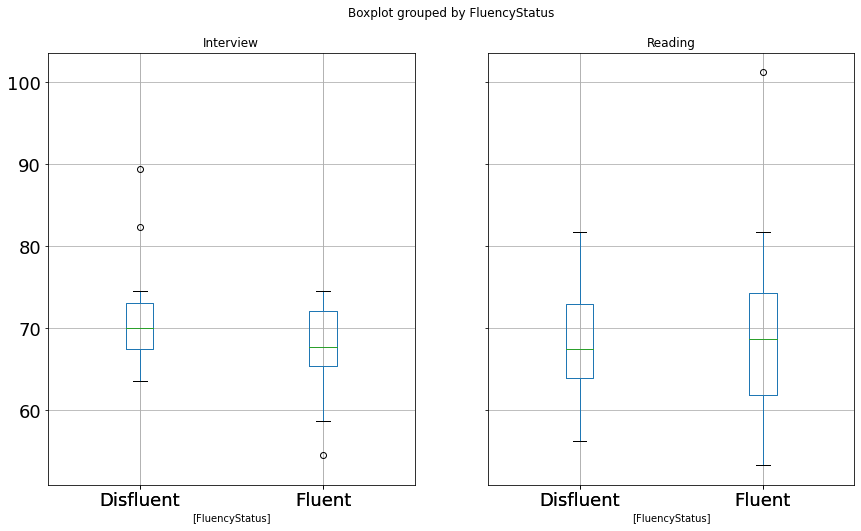

In [ ]:
boxplot = df_boxplot.boxplot(by = "FluencyStatus", figsize=[14,8], fontsize = 18, return_type='axes');

**MatplotLib**

In [ ]:
df_boxplot_reading = {'Fluent':nPVI_reading_fluent, 'Non-Fluent':nPVI_reading_disfluent}
df_boxplot_interview = {'Fluent':nPVI_interview_fluent, 'Non-Fluent':nPVI_interview_disfluent}

In [ ]:
fig, ([ax1, ax2]) = plt.subplots(1, 2)
fig.suptitle('nPVI Across Conditions', fontsize=16, fontweight='bold')
ax1.boxplot(df_boxplot_reading.values())
ax1.set_xticklabels(df_boxplot_reading.keys())
ax1.set_title("Reading")
ax1.set_ylabel("nPVI")
#ax1.set_ylim([50, 75])
#ax2.boxplot(df_boxplot_interview.values())
ax2.set_xticklabels(df_boxplot_interview.keys())
ax2.set_title("Interview")
#ax2.set_ylim([50, 75])
plt.savefig("boxplot.png");

**Save Results**

In [98]:
%cd /content/gdrive/MyDrive/RhythmAnalysisPipeline/4.MetricsResults/

/content/gdrive/MyDrive/RhythmAnalysisPipeline/4.MetricsResults


In [99]:
result_reading_fluent.to_excel("reading_fluent.xlsx")
result_reading_disfluent.to_excel("reading_disfluent.xlsx")
result_interview_fluent.to_excel("interview_fluent.xlsx")
result_interview_disfluent.to_excel("interview_disfluent.xlsx")

In [100]:
%cd /content/gdrive/MyDrive/RhythmAnalysisPipeline/

/content/gdrive/MyDrive/RhythmAnalysisPipeline
